In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn - Machine Learning Package
import sklearn.model_selection as modsel
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC


### Load and Inspect Data

In [57]:
filename = 'diabetes.csv'
DT = pd.read_csv(filename,sep=',')

####
# Data Inspection
# - Total Number of Records and Features
# - Unique Feature Data Types
# - Presence of Null Entries
####

print('Dimensions: %s records x %s features.' % DT.shape)

print('Unique Feature Data Types: %s' % len(DT.dtypes.unique()))
for x in DT.dtypes.unique():
    print(' -> '+str(x))

null_idx = DT.isnull().any().values
null_idx = null_idx[null_idx==True]
print('')
print('NULL Entries: %s \n' % len(null_idx))
if(len(null_idx)>0):
    for x in null_idx:
        if(DT.iloc[:,x].isnull()):
            print(' - ' + str(x) + ' has %s NULL entries' % len(DT[x].isnull()))
del null_idx

print(DT.info())
print('')

print('# of Negative Diagnoses: %s' % DT[DT['Outcome']==0].shape[0])
print('# of Positive Diagnoses: %s' % DT[DT['Outcome']==1].shape[0])

Dimensions: 768 records x 9 features.
Unique Feature Data Types: 2
 -> int64
 -> float64

NULL Entries: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

# of Negative Diagnoses: 500
# of Positive Diagnoses: 268


### Split Data Into Training and Data Sets

In [3]:
#Proportion of Data Used for Test Set
prop_test = 0.2

cols = DT.columns[0:-1]
str_output = 'Outcome'

#Create Train & Test Sets
X_train, X_test, y_train, y_test = modsel.train_test_split(
                DT[cols],
                DT[str_output],
                test_size=prop_test, 
                random_state=1234)

### Model Tuning Parameters

In [15]:
# Cost Parameter
C = 1.0

#{'linear','poly','rbf,'sigmoid','precomputed'} or callable matrix
kernel = 'rbf'

# Degree of polynomial kernel. Ignored unless kernel is 'poly'
degree = 3

# Kernel Coefficient for 'rbf','poly','sigmoid'. 
# 'auto' = 1/n_features
gamma ='auto'

# Independent term in kernel function. (For 'poly' & 'sigmoid')
coef0 = 0.0

# {dict, 'balanced'}
# Default class weights = 1
# 'balanced' does automatic adjustment
class_weight = None

# If True, calculate probability estimates
probability = True

# Tolerance for stopping criterion
tol = 1e-3

# Apply shrinkage {True, False}
shrinking = True

# Size of kernel cache in MB
cache_size = 200
verbose = False

# Hard limit on iterations within solver. 
# -1 indicates no limit
max_iter = -1

# {'ovo','ovr', None} - {'one-vs-one','one-vs-rest', None}
decision_function_shape = None

random_state = 12324


### Initialize & Train Model Object

In [16]:
model_svc_class=SVC(C=C, 
                    kernel=kernel,
                    degree=degree, 
                    gamma=gamma,
                    coef0=coef0, 
                    shrinking=shrinking, 
                    probability=probability, 
                    tol=tol, 
                    cache_size=cache_size, 
                    class_weight=class_weight,
                    verbose=verbose, 
                    max_iter=max_iter, 
                    decision_function_shape=decision_function_shape, 
                    random_state=random_state)

#Train Model on Data
model_svc_class.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=12324, shrinking=True,
  tol=0.001, verbose=False)

### Model Validation Training Set

In [17]:
train_preds = model_svc_class.predict(X_train)
print(classification_report(y_train,train_preds))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       401
          1       1.00      1.00      1.00       213

avg / total       1.00      1.00      1.00       614



### Model Validation - Test Set

In [18]:
test_preds = model_svc_class.predict(X_test)
print(classification_report(y_test,test_preds))

             precision    recall  f1-score   support

          0       0.64      1.00      0.78        99
          1       0.00      0.00      0.00        55

avg / total       0.41      0.64      0.50       154



### Model Validation - ROC Curve

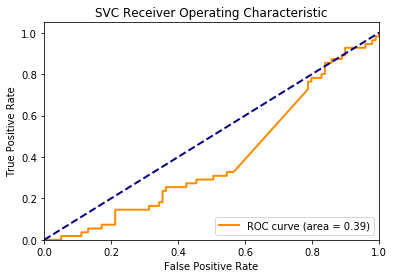

In [19]:
#Calculate Probabilities for Class 1
test_probs = model_svc_class.predict_proba(X_test)

#Calculate FPR and TPR for Difference Thresholds
fpr, tpr,thresholds = metrics.roc_curve(y_true=y_test,y_score = test_probs[:,1])

#Calculate AUC for ROC
auc = metrics.roc_auc_score(y_true=y_test,y_score = test_probs[:,1])

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Support Vector Classifier Inspection

The proportion of training data on the margin is 100%. This indicates that the raw data are not linearly separable up to $R^{9}$ space.


Total # of Support Vectors: 614
# of Support Vectors for Class 0: 401
# of Support Vectors for Class 1: 213

614


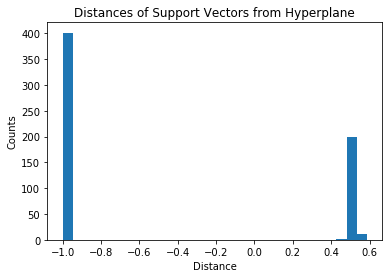

In [47]:
support_ = model_svc_class.support_vectors_
n_support_ = model_svc_class.n_support_
print('Total # of Support Vectors: %s' % len(support_))
print('# of Support Vectors for Class 0: %s' % n_support_[0])
print('# of Support Vectors for Class 1: %s' % n_support_[1])

plt.hist(model_svc_class.decision_function(support_),bins = 30)
plt.title('Distances of Support Vectors from Hyperplane')
plt.xlabel('Distance')
plt.ylabel('Counts')

### Distance from Separating Hyperplane - Test Data

The out-of-sample classification performance is extremely poor. The model predictions are biased towards the majority group. This can be improved via **feature engineering**, **hyperparameter tuning**, and **model architecture optimization**.

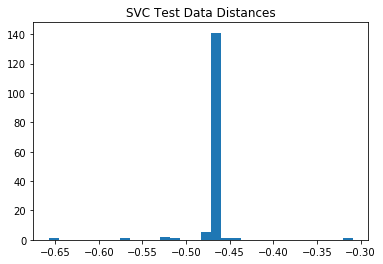

In [58]:
test_dist = model_svc_class.decision_function(X_test)

plt.hist(test_dist,bins=30,cumulative=False)
plt.title('SVC Test Data Distances')
plt.show()
